# Component 2 Question 1
#### First Edit: 03/29/2017
#### Latest Edit: 04/11/2017
----
In order to un this notebook, you need to install:
- cartopy
- ipywidgets
- plotly
- colorlover
- bokeh
----
## Read in the Grant data

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
data = pd.read_csv('./DiscGrants96to13.csv', encoding='latin')

In [3]:
data.head()

,LogNumber,Institution,Program,ProgramType,ProjectTitle,ProjectType,AwardDate,InstAddr1,InstAddr2,InstAddr3,...,Longitude,FIPSState,FIPSCounty,CensusTract,CensusBlock,FIPSMCDCode,FIPSPlaceCode,CBSACode,MetroDivisionCode,Description
0,IA-00-00-0001-00,Museum of the Aleutians,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 648,NaN,NaN,...,-166.536862,2.0,16.0,200.0,2014.0,1615.0,80770.0,NaN,NaN,NaN
1,IA-00-00-0002-00,"Depot Museum, Inc.",Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 681420,NaN,NaN,...,-85.694757,1.0,49.0,961000.0,2013.0,91206.0,27616.0,NaN,NaN,NaN
2,IA-00-00-0003-00,National Voting Rights Museum and Institute,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,6 Highway 80 East,NaN,NaN,...,-87.017024,1.0,47.0,957200.0,1005.0,92883.0,NaN,42820.0,NaN,NaN
3,IA-00-00-0004-00,Bob Jones Museum,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 613,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IA-00-00-0005-00,Coronado Museum of History and Art,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,1100 Orange Avenue,NaN,NaN,...,-117.170703,6.0,73.0,10900.0,1021.0,92780.0,16378.0,41740.0,NaN,NaN


In [4]:
data.keys()

Index(['LogNumber', 'Institution', 'Program', 'ProgramType', 'ProjectTitle',
       'ProjectType', 'AwardDate', 'InstAddr1', 'InstAddr2', 'InstAddr3',
       'InstCity', 'InstState', 'InstZip', 'AwardOrig', 'AwardTotal',
       'AppMatchAmount', 'ReqAwardAmount', 'ReqMatchAmount', 'Prefix',
       'FirstName', 'LastName', 'OrgType', 'FiscalYear', 'AwardPeriodFr',
       'AwardPeriodTo', 'OrgUnit', 'OUAddr1', 'OUAddr2', 'OUAddr3', 'OUCity',
       'OUState', 'OUZip', 'Latitude', 'Longitude', 'FIPSState', 'FIPSCounty',
       'CensusTract', 'CensusBlock', 'FIPSMCDCode', 'FIPSPlaceCode',
       'CBSACode', 'MetroDivisionCode', 'Description'],
      dtype='object')

In [5]:
data['ProgramType'].unique()

array(['IA', 'IC', 'IG', 'IL', 'IM', 'IS', 'LE', 'LG', 'LI', 'LT', 'MA',
       'MH', 'ML', 'MN', 'RE', 'ST', 'MP'], dtype=object)

In [6]:
data['FiscalYear'].value_counts()

1998    988
2001    956
1999    904
2000    894
2004    880
2003    879
2002    876
2005    873
1997    674
2010    661
2009    639
2011    628
1996    623
2012    619
2007    611
2006    580
2008    561
2013    372
Name: FiscalYear, dtype: int64

## Question 1: Exploring Program Type and Award Total

### The Distribtuion of Grant-receiving Institutes Around US (Using Cartopy)

#### !!! Need to install *cartopy* to run the following blocks !!!

In [7]:
import cartopy.crs as ccrs
import cartopy

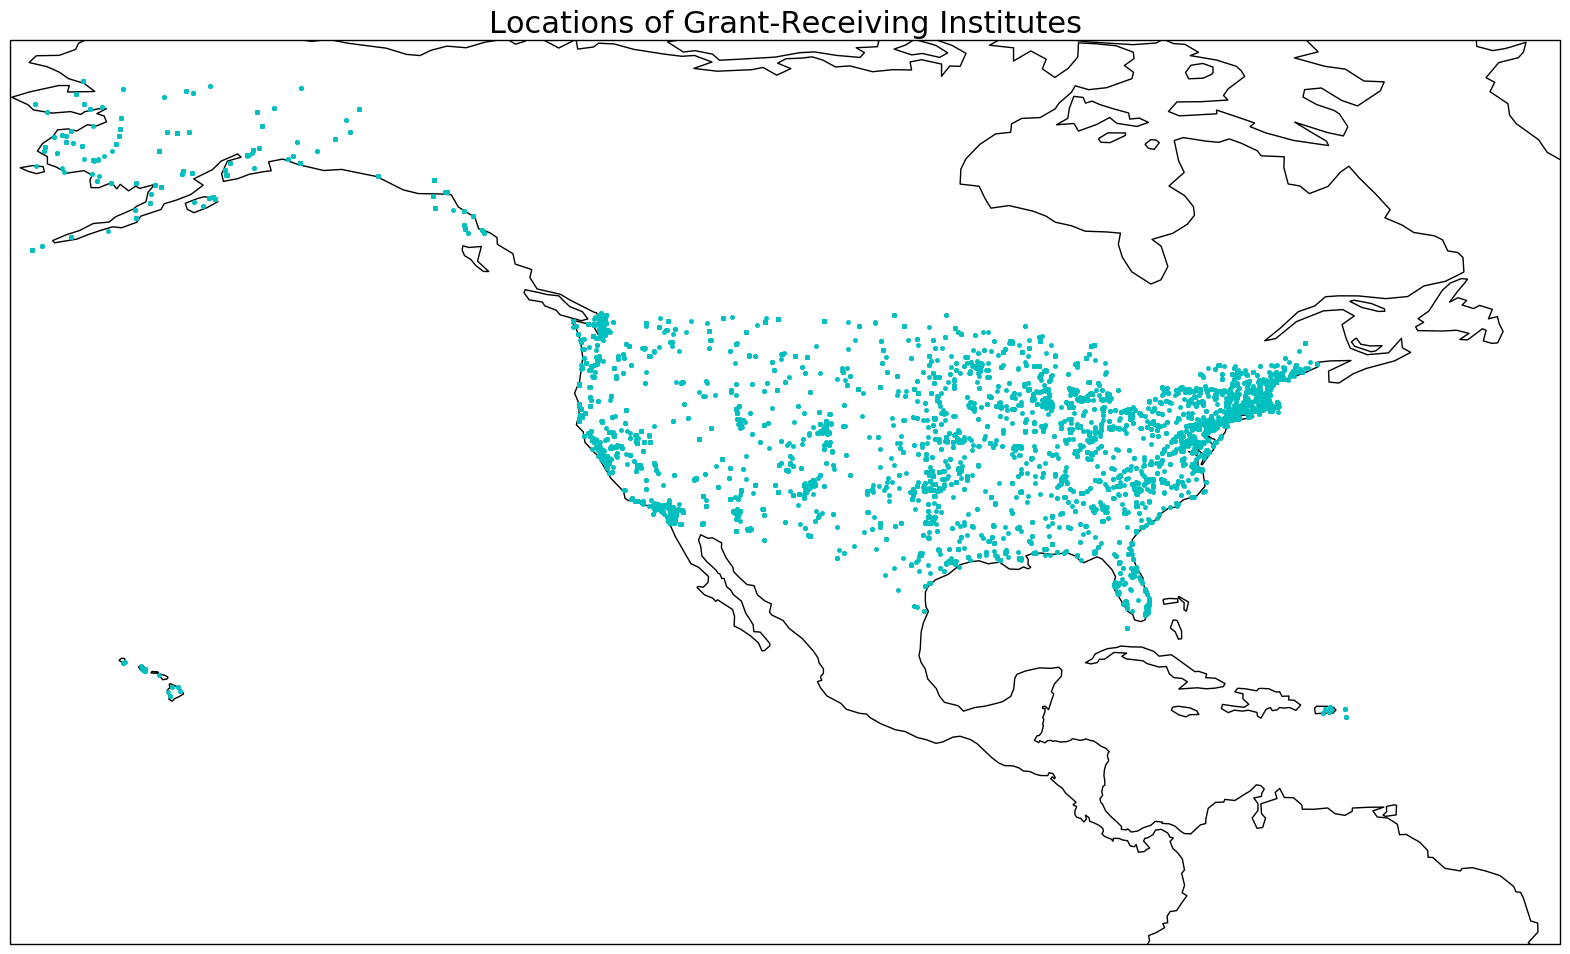

In [8]:
champaign = (40.1164, -88.2434)
fig, ax = plt.subplots(figsize = (20,20))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.coastlines()
#ax.stock_img()
ax.set_extent([champaign[1] - 80, champaign[1] + 40, champaign[0] - 40, champaign[0] + 30], ccrs.PlateCarree())
ax.plot(data["Longitude"],data["Latitude"], '.c')
ax.set_title('Locations of Grant-Receiving Institutes', fontsize = 22)
#ax.gridlines()

### The Distributions of Differenty Types of Grants (Using ipywidets)

#### !!! Need to install *ipywidgets* to run the following blocks !!!

In [9]:
plt.rcParams["figure.figsize"] = (15, 15)
def grant_type(column, value):
    good = (data[column] == value)
    data_filtered = data[good]
    champaign = (40.1164, -88.2434)
    fig, ax = plt.subplots(figsize = (20,20))
    ax = plt.axes(projection = ccrs.PlateCarree())
    ax.coastlines()
    ax.set_extent([champaign[1] - 80, champaign[1] + 40, champaign[0] - 40, champaign[0] + 30], ccrs.PlateCarree())
    ax.plot(data_filtered["Longitude"],data_filtered["Latitude"], '.c')
    ax.set_title('Prgrom Type: {0}'.format(value), fontsize = 22)

<function __main__.grant_type>

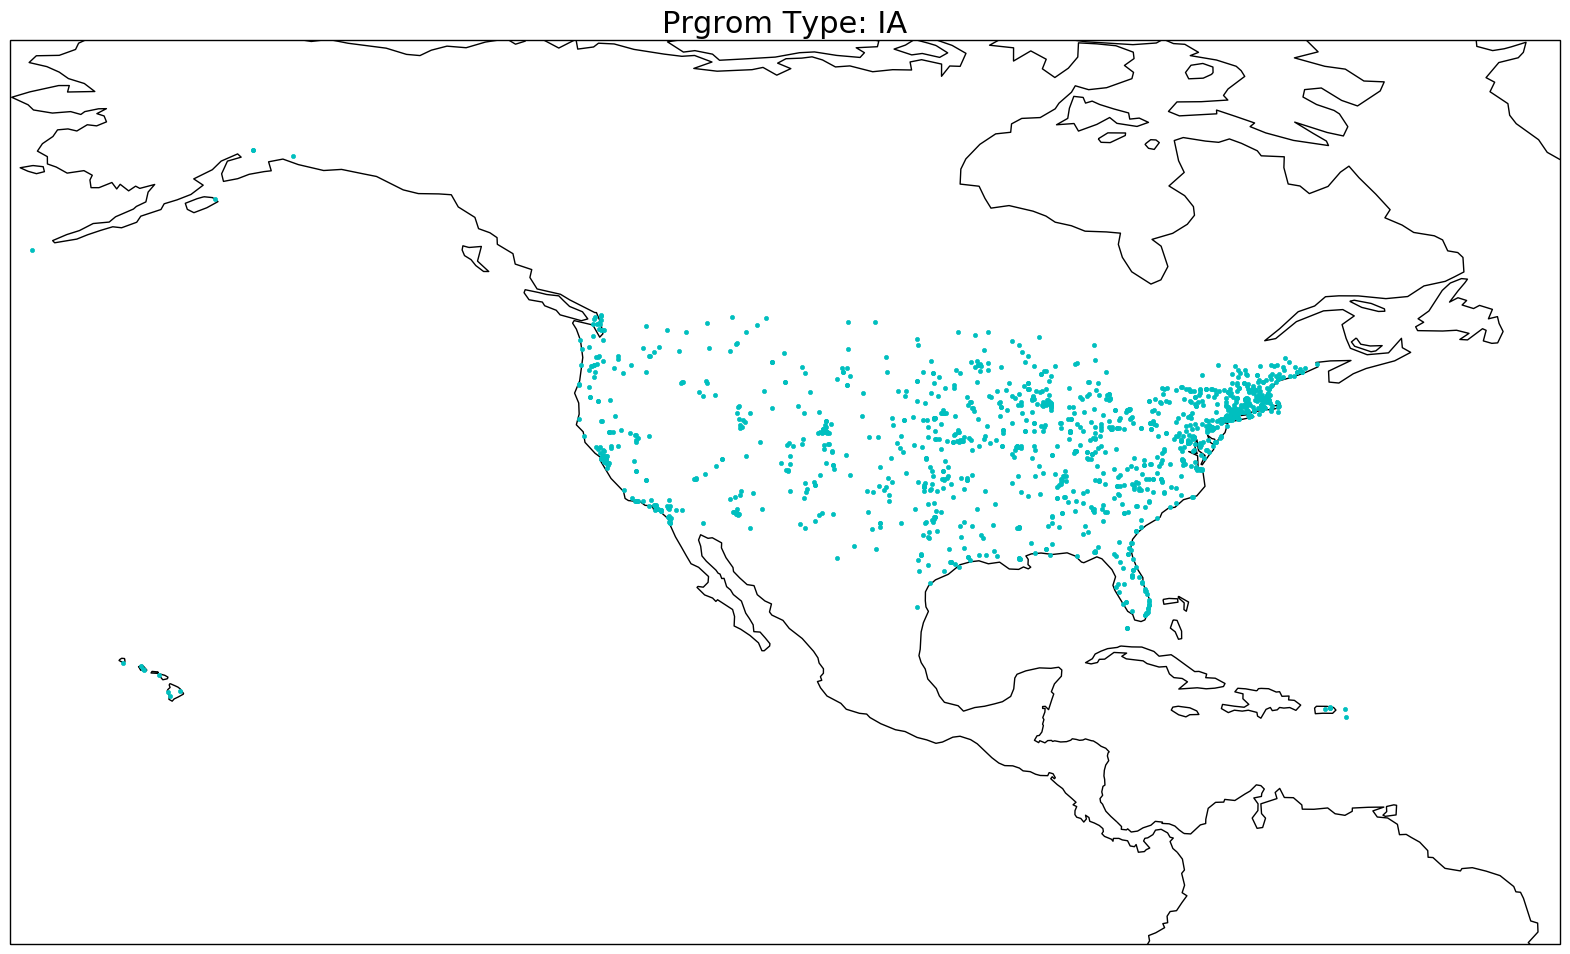

In [10]:
import ipywidgets
ipywidgets.interact(grant_type, column = 'ProgramType',
                   value = data['ProgramType'].unique().tolist())

### Trend in the Change of Grant Composition (Using Plotly)

#### !!! Need to install *plotly*  and *colorlover* to run the following blocks !!!

In [11]:
def data_filter(column,value):
    selected = data[column] == value
    data_filtered = data[selected]
    return data_filtered

In [12]:
import plotly
import plotly.plotly as py
import colorlover as cl
from plotly.graph_objs import *

plotly.tools.set_credentials_file(username='lzeng6', api_key='sET35IN6zBEbv5lZaT9M')

In [13]:
import plotly.graph_objs as go

trace = []

types = data['ProgramType'].unique().tolist()

colors = cl.scales['8']['qual']['Set2']
colors = cl.interp(colors, len(types))

for idx, pg_type in enumerate(types):
    
    dt = data_filter('ProgramType',pg_type)
    x = sorted(dt['FiscalYear'].unique().tolist())
    y = dt['FiscalYear'].value_counts().sort_index().tolist()
    trace.append(go.Scatter(
        x = x,
        y = y,
        name = pg_type,
        mode = 'lines',
        line = dict(width=1,
              color=colors[idx])
    ))

layout = go.Layout(
    showlegend=True,
    title = 'Counts of Grants by Program Type (1996-2013)',
    #updatemenu = list([
    #        dict = (
    #        ),
    #    ]
    #),
    xaxis=dict(
        title = 'Years',
        type = 'linear',
        range = [1996,2013],
        dtick = 1,
    ),
    yaxis=dict(
        title = 'Counts'
    )
)

fig = go.Figure(data = trace, layout = layout)
py.iplot(fig, filename='stream_program_type')

### Locations of Institutes and Grant Award Total (Using Bokeh)

#### !!! Need to install *bokeh* to run the following blocks !!!

In [14]:
from bokeh.io import output_notebook, show, gridplot
from bokeh.plotting import figure
import bokeh.models
from bokeh.models import PrintfTickFormatter

In [15]:
output_notebook()

Loading BokehJS ...

In [16]:
dt = data.copy()[['FiscalYear','AwardTotal','Longitude','Latitude']]
source = bokeh.models.ColumnDataSource(dt)

In [17]:
TOOLS = 'box_select,lasso_select,help,reset,box_zoom'

p1 = figure(tools = TOOLS, 
                title = "Grant Award Total by Fiscal Year",
                width=600, height = 600, 
                x_range = (1995,2014), y_range = (0, 1000000),
                x_axis_label = 'Fiscal Year', y_axis_label = 'Award Total')

p1.yaxis[0].formatter = PrintfTickFormatter(format="%6.0f")
                
p2 = figure(tools = TOOLS, 
                title = "Locations of Institutes",
                width=600, height = 600,
                x_axis_label = 'Longitude', y_axis_label = "Latitude")

p2.xaxis[0].formatter = PrintfTickFormatter(format="%5.2f")
p2.yaxis[0].formatter = PrintfTickFormatter(format="%5.2f")

In [18]:
p1.circle('FiscalYear','AwardTotal', source = source,
                 size = 2,
                 selection_color="firebrick",
                 nonselection_fill_alpha=0.05,
                 nonselection_fill_color="blue")
p2.circle('Longitude','Latitude', source = source,
                 size = 2,
                 selection_color="firebrick",
                 nonselection_fill_alpha=0.05,
                 nonselection_fill_color="blue")

In [19]:
p = gridplot([[p1, p2]])
show(p)